## Подготовка датасетов

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import dask.dataframe as dd

In [3]:
test = pd.read_csv('data//data_test.csv')

In [4]:
train = pd.read_csv('data//data_train.csv')

In [5]:
train

,Unnamed: 0,id,vas_id,buy_time,target
0,0,540968,8.0,1537131600,0.0
1,1,1454121,4.0,1531688400,0.0
2,2,2458816,1.0,1534107600,0.0
3,3,3535012,5.0,1535922000,0.0
4,4,1693214,1.0,1535922000,0.0
...,...,...,...,...,...
831648,831648,3812226,2.0,1546203600,0.0
831649,831649,2480469,2.0,1546203600,0.0
831650,831650,158236,2.0,1546203600,0.0
831651,831651,1825525,2.0,1546203600,0.0


In [6]:
test

,Unnamed: 0,id,vas_id,buy_time
0,0,3130519,2.0,1548018000
1,1,2000860,4.0,1548018000
2,2,1099444,2.0,1546808400
3,3,1343255,5.0,1547413200
4,4,1277040,2.0,1546808400
...,...,...,...,...
71226,71226,2502453,5.0,1548018000
71227,71227,1693213,2.0,1548018000
71228,71228,1891350,2.0,1548018000
71229,71229,2437172,2.0,1548018000


In [7]:
train['id'].nunique()

806613

Связывание features с features.csv через dask.dataframe

In [8]:
features = dd.read_csv('data//features_optimize.csv', blocksize=25e6, sep='\t')

Выбраем информацию о тех пользователях, которые присутствуют в train и test

In [9]:
features_train = features.loc[features['id'].isin(train['id'])].compute()

In [10]:
features_test = features.loc[features['id'].isin(test['id'])].compute()

### Обзор features_train

Дубликатов строк нет

In [11]:
features_train.duplicated().sum()

0

В features_train есть несколько записей для пользователей с одним id

In [12]:
features_train.shape[0]

826979

In [13]:
features_train['id'].nunique()

806613

In [14]:
dif = features_train.shape[0] - features_train['id'].nunique()
dif

20366

In [15]:
features_train[features_train['id'].duplicated(keep=False)].sort_values(by='id')

,Unnamed: 0,id,buy_time,0,1,2,3,4,5,6,...,243,244,245,246,247,248,249,250,251,252
3205,206842,372,1544994000,-96.799971,-143.929112,-109.050786,-174.096798,-114.468246,-195.20179,-16.08618,...,-835.373846,-471.770792,-25.996269,-37.630448,-290.747724,-22.832889,-0.694428,-12.175933,-0.45614,0.0
3206,206843,372,1544389200,159.560029,-100.259112,146.889214,-110.936798,141.471754,-132.04179,-16.08618,...,4405.626154,1933.229208,-25.996269,-37.630448,29.252276,-22.832889,-0.694428,-12.175933,-0.45614,0.0
4660,192690,404,1533502800,-78.159971,499.180888,-84.480786,460.553202,-89.898246,439.44821,-16.08618,...,-408.373846,-588.770792,-25.996269,-22.630448,861.252276,34.167111,-0.694428,47.824067,-0.45614,0.0
4661,192691,404,1540155600,354.550029,164.940888,526.199214,327.583202,520.781754,306.47821,403.40382,...,2712.626154,1326.229208,-24.996269,102.369552,201.252276,30.167111,-0.694428,-10.175933,-0.45614,0.0
4317,592057,487,1544389200,-28.169971,-30.359112,119.749214,417.873202,114.331754,396.76821,-16.08618,...,-973.373846,-613.770792,-25.996269,-9.630448,11.252276,45.167111,0.305572,-12.175933,2.54386,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,712421,4361213,1542574800,-91.199971,-162.239112,-105.140786,-206.376798,-110.558246,-227.48179,-16.08618,...,-963.373846,-613.770792,-25.996269,-37.630448,-237.747724,-23.832889,-0.694428,-12.175933,-0.45614,0.0
1427,69426,4361592,1546203600,12.230029,-30.389112,16.629214,0.583202,11.211754,-20.52179,49.08382,...,-553.373846,-496.770792,-24.996269,40.369552,109.252276,3.167111,-0.694428,-12.175933,-0.45614,0.0
1426,69425,4361592,1547413200,-67.219971,-117.149112,-62.830786,-105.426798,-68.248246,-126.53179,-5.25618,...,-933.373846,-607.770792,-24.996269,-8.630448,-153.747724,-3.832889,-0.694428,-12.175933,-0.45614,0.0
972,178533,4361764,1544994000,-10.789971,-6.259112,103.229214,86.873202,97.811754,67.29821,-16.08618,...,986.626154,-147.770792,-25.996269,-37.630448,271.252276,35.167111,-0.694428,-12.175933,-0.45614,1.0


In [16]:
dublicated = features_train[features_train['id'].duplicated(keep=False)].sort_values(by='id')['id'].value_counts()

In [17]:
dublicated

372        2
3034771    2
3036453    2
3036395    2
3036260    2
          ..
1479862    2
1479649    2
1479636    2
1479069    2
4361764    2
Name: id, Length: 20366, dtype: int64

То есть 20366 пользователей имеют по 2 записи в features_train (по два профиля каждого такого пользователя). Их данные собраны в разное время. Поэтому сливать таблицы features_train и train надо с учетом столбца buy_time

### Обзор train

In [18]:
train['id'].shape[0]

831653

In [19]:
train['id'].nunique()

806613

In [20]:
diff = train['id'].shape[0] - train['id'].nunique()

In [21]:
diff

25040

In [22]:
train[train['id'].duplicated(keep=False)].sort_values(by='id')

,Unnamed: 0,id,vas_id,buy_time,target
14042,14042,342,2.0,1542574800,1.0
14041,14041,342,1.0,1541365200,0.0
19825,19825,492,6.0,1544994000,1.0
19824,19824,492,4.0,1538946000,0.0
22908,22908,579,4.0,1542574800,1.0
...,...,...,...,...,...
751154,751154,4339012,2.0,1542574800,1.0
248700,248700,4347691,4.0,1543179600,0.0
248701,248701,4347691,6.0,1542574800,1.0
366175,366175,4350615,2.0,1544389200,1.0


То есть одни и те же пользователи в разные моменты времени подключали и отказывались от подключения разных услуг. Здесь нужно добавлять актуальный профиль пользователя из features_train (если их там неколько) на момент согласия или отказа. 

### Рассмотрим отдельную запись

В train пользователь 4361764 имеет одну запись, а в features_train - 2 профиля потребления. Из features_train надо добавлять тот профиль, который был ближе по времени.

In [23]:
a = features_train.loc[features_train['id']==4361764]

In [24]:
b = train.loc[train['id']==4361764]

In [25]:
a

,Unnamed: 0,id,buy_time,0,1,2,3,4,5,6,...,243,244,245,246,247,248,249,250,251,252
971,178532,4361764,1531688400,-79.849971,-1.389112,-93.790786,-49.766798,-81.418246,0.30821,-16.08618,...,-337.373846,-309.770792,-25.996269,-30.630448,-115.747724,-1.832889,-0.694428,11.824067,-0.45614,0.0
972,178533,4361764,1544994000,-10.789971,-6.259112,103.229214,86.873202,97.811754,67.29821,-16.08618,...,986.626154,-147.770792,-25.996269,-37.630448,271.252276,35.167111,-0.694428,-12.175933,-0.45614,1.0


In [26]:
a = a.sort_values(by='buy_time')

In [27]:
b

,Unnamed: 0,id,vas_id,buy_time,target
804857,804857,4361764,1.0,1542574800,0.0


In [28]:
# Если делать через merge_asof, то в результате будет много строк, содержащих NaN, так как для многих пользователей 
# buy_time в train был зафиксирован раньше, чем профиль пользователя
c = pd.merge_asof(b, a, on='buy_time', by='id')

In [29]:
c

,Unnamed: 0_x,id,vas_id,buy_time,target,Unnamed: 0_y,0,1,2,3,...,243,244,245,246,247,248,249,250,251,252
0,804857,4361764,1.0,1542574800,0.0,178532,-79.849971,-1.389112,-93.790786,-49.766798,...,-337.373846,-309.770792,-25.996269,-30.630448,-115.747724,-1.832889,-0.694428,11.824067,-0.45614,0.0


In [30]:
# Если делать через merge, то данные будут дублироваться. Необходимо удалить все дубли кроме тех, в которых разность
# между buy_time_x и buy_time_y минимальна. 
c = pd.merge(b, a, on='id')
c

,Unnamed: 0_x,id,vas_id,buy_time_x,target,Unnamed: 0_y,buy_time_y,0,1,2,...,243,244,245,246,247,248,249,250,251,252
0,804857,4361764,1.0,1542574800,0.0,178532,1531688400,-79.849971,-1.389112,-93.790786,...,-337.373846,-309.770792,-25.996269,-30.630448,-115.747724,-1.832889,-0.694428,11.824067,-0.45614,0.0
1,804857,4361764,1.0,1542574800,0.0,178533,1544994000,-10.789971,-6.259112,103.229214,...,986.626154,-147.770792,-25.996269,-37.630448,271.252276,35.167111,-0.694428,-12.175933,-0.45614,1.0


### Объединение train и features_train

In [31]:
train = pd.merge(train, features_train, on='id')

In [32]:
train

,Unnamed: 0_x,id,vas_id,buy_time_x,target,Unnamed: 0_y,buy_time_y,0,1,2,...,243,244,245,246,247,248,249,250,251,252
0,0,540968,8.0,1537131600,0.0,759457,1541970000,-31.559971,327.360888,-45.500786,...,-845.373846,-613.770792,-20.996269,-37.630448,-28.747724,4.167111,7.305572,-12.175933,21.54386,0.0
1,1,1454121,4.0,1531688400,0.0,561573,1531083600,547.270029,238.430888,533.329214,...,-972.373846,-613.770792,-25.996269,-19.630448,-278.747724,-24.832889,-0.694428,-11.175933,-0.45614,0.0
2,2,2458816,1.0,1534107600,0.0,727153,1543179600,-92.139971,-95.469112,-106.080786,...,-977.373846,-613.770792,-25.996269,-37.630448,-304.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
3,3,3535012,5.0,1535922000,0.0,341237,1533502800,54.880029,12.970888,54.079214,...,-977.373846,-613.770792,-25.996269,-18.630448,-133.747724,-14.832889,-0.694428,-1.175933,-0.45614,0.0
4,4,1693214,1.0,1535922000,0.0,151349,1543179600,45.160029,295.240888,64.679214,...,-965.373846,-612.770792,-22.996269,-32.630448,-127.747724,-4.832889,-0.694428,-12.175933,-0.45614,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852693,831648,3812226,2.0,1546203600,0.0,729425,1532898000,29.750029,6.200888,24.279214,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
852694,831649,2480469,2.0,1546203600,0.0,236846,1532293200,-89.179971,-56.499112,-103.120786,...,-66.373846,-321.770792,-25.996269,62.369552,1167.252276,41.167111,-0.694428,54.824067,-0.45614,0.0
852695,831650,158236,2.0,1546203600,0.0,759177,1538946000,-96.799971,62.140888,-110.740786,...,-683.373846,-470.770792,-25.996269,-37.630448,99.252276,178.167111,-0.694428,191.824067,-0.45614,0.0
852696,831651,1825525,2.0,1546203600,0.0,54072,1533502800,-96.799971,-81.919112,-110.740786,...,1018.626154,1367.229208,-24.996269,-35.630448,-237.747724,-21.832889,-0.694428,-8.175933,-0.45614,1.0


In [33]:
train['1'].isnull().sum()

0

In [34]:
tmp = train.loc[train['id'].isin(dublicated.index)]

In [35]:
tmp

,Unnamed: 0_x,id,vas_id,buy_time_x,target,Unnamed: 0_y,buy_time_y,0,1,2,...,243,244,245,246,247,248,249,250,251,252
57,57,3577738,1.0,1532293200,0.0,610726,1540760400,-96.799971,45.210888,-104.810786,...,-929.373846,-565.770792,-25.996269,-28.630448,-177.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
58,57,3577738,1.0,1532293200,0.0,610727,1537736400,-96.799971,104.530888,-8.220786,...,-969.373846,-605.770792,-25.996269,-35.630448,-159.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
62,61,203194,1.0,1532293200,0.0,31012,1542574800,-96.799971,-111.569112,-110.740786,...,-977.373846,-613.770792,-25.996269,-37.630448,-258.747724,-24.832889,-0.694428,-12.175933,-0.45614,0.0
63,61,203194,1.0,1532293200,0.0,31013,1540760400,-96.799971,-170.889112,-110.740786,...,-977.373846,-613.770792,-25.996269,-37.630448,-297.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
84,82,3855134,2.0,1544389200,0.0,597702,1548018000,-38.909971,-157.209112,-35.350786,...,-849.373846,-493.770792,-25.996269,-37.630448,-284.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852106,831063,4341262,2.0,1546203600,0.0,197455,1547413200,-93.799971,-176.009112,-107.740786,...,-976.373846,-613.770792,-25.996269,-33.630448,-277.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
852540,831497,3237930,5.0,1546203600,0.0,67133,1546808400,-96.799971,-408.179112,-110.740786,...,11451.626154,10062.229208,3135.003731,1735.369552,10957.252276,-1.832889,4.305572,-12.175933,-0.45614,0.0
852541,831497,3237930,5.0,1546203600,0.0,67134,1544994000,-96.799971,-26.819112,-110.740786,...,1751.626154,-41.770792,937.003731,2691.369552,11960.252276,134.167111,12.305572,-9.175933,3.54386,0.0
852675,831631,3431643,5.0,1546203600,0.0,209460,1547413200,-95.299971,-248.349112,-109.240786,...,-642.373846,-613.770792,-25.996269,-37.630448,-186.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0


Получили 42090 дублированных строк. Оставим только те, у которых разность между buy_time_x и buy_time_y минимальна. Создадаим переменную delta.

In [37]:
tmp = tmp.drop(columns=['delta'])

In [38]:
tmp.loc[:, 'delta'] = abs(tmp.loc[:, 'buy_time_x'] - tmp.loc[:, 'buy_time_y'])

In [39]:
tmp

,Unnamed: 0_x,id,vas_id,buy_time_x,target,Unnamed: 0_y,buy_time_y,0,1,2,...,244,245,246,247,248,249,250,251,252,delta
57,57,3577738,1.0,1532293200,0.0,610726,1540760400,-96.799971,45.210888,-104.810786,...,-565.770792,-25.996269,-28.630448,-177.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,8467200
58,57,3577738,1.0,1532293200,0.0,610727,1537736400,-96.799971,104.530888,-8.220786,...,-605.770792,-25.996269,-35.630448,-159.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,5443200
62,61,203194,1.0,1532293200,0.0,31012,1542574800,-96.799971,-111.569112,-110.740786,...,-613.770792,-25.996269,-37.630448,-258.747724,-24.832889,-0.694428,-12.175933,-0.45614,0.0,10281600
63,61,203194,1.0,1532293200,0.0,31013,1540760400,-96.799971,-170.889112,-110.740786,...,-613.770792,-25.996269,-37.630448,-297.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,8467200
84,82,3855134,2.0,1544389200,0.0,597702,1548018000,-38.909971,-157.209112,-35.350786,...,-493.770792,-25.996269,-37.630448,-284.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,3628800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852106,831063,4341262,2.0,1546203600,0.0,197455,1547413200,-93.799971,-176.009112,-107.740786,...,-613.770792,-25.996269,-33.630448,-277.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,1209600
852540,831497,3237930,5.0,1546203600,0.0,67133,1546808400,-96.799971,-408.179112,-110.740786,...,10062.229208,3135.003731,1735.369552,10957.252276,-1.832889,4.305572,-12.175933,-0.45614,0.0,604800
852541,831497,3237930,5.0,1546203600,0.0,67134,1544994000,-96.799971,-26.819112,-110.740786,...,-41.770792,937.003731,2691.369552,11960.252276,134.167111,12.305572,-9.175933,3.54386,0.0,1209600
852675,831631,3431643,5.0,1546203600,0.0,209460,1547413200,-95.299971,-248.349112,-109.240786,...,-613.770792,-25.996269,-37.630448,-186.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,1209600


Отсортируем tmp по id и delta

In [40]:
tmp.sort_values(by = ['Unnamed: 0_x', 'delta'], inplace=True)

In [41]:
tmp

,Unnamed: 0_x,id,vas_id,buy_time_x,target,Unnamed: 0_y,buy_time_y,0,1,2,...,244,245,246,247,248,249,250,251,252,delta
58,57,3577738,1.0,1532293200,0.0,610727,1537736400,-96.799971,104.530888,-8.220786,...,-605.770792,-25.996269,-35.630448,-159.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,5443200
57,57,3577738,1.0,1532293200,0.0,610726,1540760400,-96.799971,45.210888,-104.810786,...,-565.770792,-25.996269,-28.630448,-177.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,8467200
63,61,203194,1.0,1532293200,0.0,31013,1540760400,-96.799971,-170.889112,-110.740786,...,-613.770792,-25.996269,-37.630448,-297.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,8467200
62,61,203194,1.0,1532293200,0.0,31012,1542574800,-96.799971,-111.569112,-110.740786,...,-613.770792,-25.996269,-37.630448,-258.747724,-24.832889,-0.694428,-12.175933,-0.45614,0.0,10281600
85,82,3855134,2.0,1544389200,0.0,597703,1546808400,-96.799971,-246.059112,-93.240786,...,-417.770792,-25.996269,-37.630448,-241.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,2419200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852105,831063,4341262,2.0,1546203600,0.0,197454,1548018000,-96.799971,-176.009112,-110.740786,...,-613.770792,-24.996269,-37.630448,-294.747724,-23.832889,-0.694428,-12.175933,-0.45614,0.0,1814400
852540,831497,3237930,5.0,1546203600,0.0,67133,1546808400,-96.799971,-408.179112,-110.740786,...,10062.229208,3135.003731,1735.369552,10957.252276,-1.832889,4.305572,-12.175933,-0.45614,0.0,604800
852541,831497,3237930,5.0,1546203600,0.0,67134,1544994000,-96.799971,-26.819112,-110.740786,...,-41.770792,937.003731,2691.369552,11960.252276,134.167111,12.305572,-9.175933,3.54386,0.0,1209600
852675,831631,3431643,5.0,1546203600,0.0,209460,1547413200,-95.299971,-248.349112,-109.240786,...,-613.770792,-25.996269,-37.630448,-186.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,1209600


In [42]:
tmp['Unnamed: 0_x'].value_counts()

57        2
544690    2
544639    2
544633    2
544632    2
         ..
271332    2
271330    2
271310    2
271294    2
831631    2
Name: Unnamed: 0_x, Length: 21045, dtype: int64

In [43]:
del_idx = tmp['Unnamed: 0_x'].duplicated()

In [44]:
del_idx

58        False
57         True
63        False
62         True
85        False
          ...  
852105     True
852540    False
852541     True
852675    False
852676     True
Name: Unnamed: 0_x, Length: 42090, dtype: bool

Нужно удалить строки из train, индексы которых стоят напротив True в del_idx (они обладают большим значением delta)

In [45]:
del_idx = del_idx[del_idx.values == True]

In [46]:
del_idx

57        True
62        True
84        True
130       True
143       True
          ... 
851715    True
851995    True
852105    True
852541    True
852676    True
Name: Unnamed: 0_x, Length: 21045, dtype: bool

In [47]:
train.drop(del_idx.index, axis=0, inplace=True)

In [48]:
train

,Unnamed: 0_x,id,vas_id,buy_time_x,target,Unnamed: 0_y,buy_time_y,0,1,2,...,243,244,245,246,247,248,249,250,251,252
0,0,540968,8.0,1537131600,0.0,759457,1541970000,-31.559971,327.360888,-45.500786,...,-845.373846,-613.770792,-20.996269,-37.630448,-28.747724,4.167111,7.305572,-12.175933,21.54386,0.0
1,1,1454121,4.0,1531688400,0.0,561573,1531083600,547.270029,238.430888,533.329214,...,-972.373846,-613.770792,-25.996269,-19.630448,-278.747724,-24.832889,-0.694428,-11.175933,-0.45614,0.0
2,2,2458816,1.0,1534107600,0.0,727153,1543179600,-92.139971,-95.469112,-106.080786,...,-977.373846,-613.770792,-25.996269,-37.630448,-304.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
3,3,3535012,5.0,1535922000,0.0,341237,1533502800,54.880029,12.970888,54.079214,...,-977.373846,-613.770792,-25.996269,-18.630448,-133.747724,-14.832889,-0.694428,-1.175933,-0.45614,0.0
4,4,1693214,1.0,1535922000,0.0,151349,1543179600,45.160029,295.240888,64.679214,...,-965.373846,-612.770792,-22.996269,-32.630448,-127.747724,-4.832889,-0.694428,-12.175933,-0.45614,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852693,831648,3812226,2.0,1546203600,0.0,729425,1532898000,29.750029,6.200888,24.279214,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
852694,831649,2480469,2.0,1546203600,0.0,236846,1532293200,-89.179971,-56.499112,-103.120786,...,-66.373846,-321.770792,-25.996269,62.369552,1167.252276,41.167111,-0.694428,54.824067,-0.45614,0.0
852695,831650,158236,2.0,1546203600,0.0,759177,1538946000,-96.799971,62.140888,-110.740786,...,-683.373846,-470.770792,-25.996269,-37.630448,99.252276,178.167111,-0.694428,191.824067,-0.45614,0.0
852696,831651,1825525,2.0,1546203600,0.0,54072,1533502800,-96.799971,-81.919112,-110.740786,...,1018.626154,1367.229208,-24.996269,-35.630448,-237.747724,-21.832889,-0.694428,-8.175933,-0.45614,1.0


Итого количество строк равно количеству строк в train. Если для данного пользователя в features_train было несколько записей, учитываем только ту, которая по времени была ближе к той, которая в train

In [50]:
train = train.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'buy_time_y'])

In [52]:
train

,id,vas_id,buy_time_x,target,0,1,2,3,4,5,...,243,244,245,246,247,248,249,250,251,252
0,540968,8.0,1537131600,0.0,-31.559971,327.360888,-45.500786,274.753202,-50.918246,253.64821,...,-845.373846,-613.770792,-20.996269,-37.630448,-28.747724,4.167111,7.305572,-12.175933,21.54386,0.0
1,1454121,4.0,1531688400,0.0,547.270029,238.430888,533.329214,274.803202,527.911754,253.69821,...,-972.373846,-613.770792,-25.996269,-19.630448,-278.747724,-24.832889,-0.694428,-11.175933,-0.45614,0.0
2,2458816,1.0,1534107600,0.0,-92.139971,-95.469112,-106.080786,-139.596798,-111.498246,-142.90179,...,-977.373846,-613.770792,-25.996269,-37.630448,-304.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
3,3535012,5.0,1535922000,0.0,54.880029,12.970888,54.079214,-9.116798,48.661754,-30.22179,...,-977.373846,-613.770792,-25.996269,-18.630448,-133.747724,-14.832889,-0.694428,-1.175933,-0.45614,0.0
4,1693214,1.0,1535922000,0.0,45.160029,295.240888,64.679214,344.283202,59.261754,323.17821,...,-965.373846,-612.770792,-22.996269,-32.630448,-127.747724,-4.832889,-0.694428,-12.175933,-0.45614,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852693,3812226,2.0,1546203600,0.0,29.750029,6.200888,24.279214,-37.936798,18.861754,-59.04179,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
852694,2480469,2.0,1546203600,0.0,-89.179971,-56.499112,-103.120786,-109.106798,-108.538246,-130.21179,...,-66.373846,-321.770792,-25.996269,62.369552,1167.252276,41.167111,-0.694428,54.824067,-0.45614,0.0
852695,158236,2.0,1546203600,0.0,-96.799971,62.140888,-110.740786,9.533202,-116.158246,-11.57179,...,-683.373846,-470.770792,-25.996269,-37.630448,99.252276,178.167111,-0.694428,191.824067,-0.45614,0.0
852696,1825525,2.0,1546203600,0.0,-96.799971,-81.919112,-110.740786,-128.596798,-116.158246,-76.82179,...,1018.626154,1367.229208,-24.996269,-35.630448,-237.747724,-21.832889,-0.694428,-8.175933,-0.45614,1.0


In [53]:
train.rename(columns={'buy_time_x': 'buy_time'}, inplace=True)

In [54]:
train

,id,vas_id,buy_time,target,0,1,2,3,4,5,...,243,244,245,246,247,248,249,250,251,252
0,540968,8.0,1537131600,0.0,-31.559971,327.360888,-45.500786,274.753202,-50.918246,253.64821,...,-845.373846,-613.770792,-20.996269,-37.630448,-28.747724,4.167111,7.305572,-12.175933,21.54386,0.0
1,1454121,4.0,1531688400,0.0,547.270029,238.430888,533.329214,274.803202,527.911754,253.69821,...,-972.373846,-613.770792,-25.996269,-19.630448,-278.747724,-24.832889,-0.694428,-11.175933,-0.45614,0.0
2,2458816,1.0,1534107600,0.0,-92.139971,-95.469112,-106.080786,-139.596798,-111.498246,-142.90179,...,-977.373846,-613.770792,-25.996269,-37.630448,-304.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
3,3535012,5.0,1535922000,0.0,54.880029,12.970888,54.079214,-9.116798,48.661754,-30.22179,...,-977.373846,-613.770792,-25.996269,-18.630448,-133.747724,-14.832889,-0.694428,-1.175933,-0.45614,0.0
4,1693214,1.0,1535922000,0.0,45.160029,295.240888,64.679214,344.283202,59.261754,323.17821,...,-965.373846,-612.770792,-22.996269,-32.630448,-127.747724,-4.832889,-0.694428,-12.175933,-0.45614,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852693,3812226,2.0,1546203600,0.0,29.750029,6.200888,24.279214,-37.936798,18.861754,-59.04179,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
852694,2480469,2.0,1546203600,0.0,-89.179971,-56.499112,-103.120786,-109.106798,-108.538246,-130.21179,...,-66.373846,-321.770792,-25.996269,62.369552,1167.252276,41.167111,-0.694428,54.824067,-0.45614,0.0
852695,158236,2.0,1546203600,0.0,-96.799971,62.140888,-110.740786,9.533202,-116.158246,-11.57179,...,-683.373846,-470.770792,-25.996269,-37.630448,99.252276,178.167111,-0.694428,191.824067,-0.45614,0.0
852696,1825525,2.0,1546203600,0.0,-96.799971,-81.919112,-110.740786,-128.596798,-116.158246,-76.82179,...,1018.626154,1367.229208,-24.996269,-35.630448,-237.747724,-21.832889,-0.694428,-8.175933,-0.45614,1.0


### Обзор features_test

Дубликатов строк нет

In [55]:
features_test.duplicated().sum()

0

Есть разные строки с одинаковыми id

In [56]:
dif = features_test.shape[0] - features_test['id'].nunique()
dif

200

In [57]:
features_test[features_test['id'].duplicated(keep=False)].sort_values(by='id')

,Unnamed: 0,id,buy_time,0,1,2,3,4,5,6,...,243,244,245,246,247,248,249,250,251,252
4268,72314,10021,1548018000,-85.109971,-361.399112,-93.240786,-348.196798,-98.658246,-369.30179,-16.08618,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
4267,72313,10021,1546808400,-85.109971,-384.779112,-77.400786,-398.196798,-82.818246,-419.30179,-16.08618,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
2932,258674,20044,1544389200,78.790029,233.500888,89.409214,239.353202,83.991754,218.24821,-16.08618,...,-489.373846,-251.770792,-25.996269,-36.630448,-39.747724,-2.832889,-0.694428,-12.175933,-0.45614,0.0
2933,258675,20044,1548018000,-75.959971,-354.589112,-77.400786,-351.336798,-82.818246,-372.44179,-16.08618,...,81.626154,222.229208,-25.996269,-33.630448,-119.747724,-5.832889,-0.694428,-12.175933,-0.45614,0.0
2825,631880,54687,1542574800,-96.799971,-128.519112,-110.740786,-181.126798,-113.618246,-192.06179,-16.08618,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,253930,4276695,1547413200,183.200029,-109.469112,178.569214,-123.456798,173.151754,-144.56179,-16.08618,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
3397,154909,4289316,1542574800,34.570029,62.170888,20.629214,9.563202,15.211754,-11.54179,-16.08618,...,785.626154,691.229208,-25.996269,-33.630448,-191.747724,-23.832889,-0.694428,-12.175933,-0.45614,0.0
3398,154910,4289316,1548018000,155.680029,585.410888,141.739214,536.973202,136.321754,515.86821,-16.08618,...,-928.373846,-590.770792,-25.996269,172.369552,-121.747724,46.167111,-0.694428,-12.175933,0.54386,0.0
4702,88411,4333389,1548018000,-88.549971,46.650888,-102.490786,25.713202,-107.908246,4.60821,-16.08618,...,10677.626154,-600.770792,-25.996269,-37.630448,1325.252276,146.167111,-0.694428,-12.175933,-0.45614,0.0


In [58]:
dublicated = features_test[features_test['id'].duplicated(keep=False)].sort_values(by='id')['id'].value_counts()

In [59]:
dublicated

10021      2
2994844    2
2588916    2
2639889    2
2673799    2
          ..
1182539    2
1231921    2
1264182    2
1350725    2
4333389    2
Name: id, Length: 200, dtype: int64

В features_test для 200 пользователей существует по 2 записи

### Обзор test

In [60]:
diff = test['id'].shape[0] - test['id'].nunique()

In [61]:
diff

1079

In [62]:
test[test['id'].duplicated(keep=False)].sort_values(by='id')

,Unnamed: 0,id,vas_id,buy_time
552,552,274,4.0,1548018000
551,551,274,2.0,1547413200
10677,10677,4770,4.0,1547413200
10676,10676,4770,2.0,1548018000
20241,20241,8166,1.0,1546808400
...,...,...,...,...
47995,47995,4231949,2.0,1546808400
69800,69800,4256618,2.0,1546808400
69801,69801,4256618,6.0,1548018000
17218,17218,4348306,4.0,1546808400


В test одни и те же пользователи в разные моменты времени подключали и отказывались подключать разные услуги

### Объединение test и features_test

Обработка данных аналогична train и features_train. features_test есть несколько записей для определенного числа пользователей. Поэтому в test из нее будем добавлять строку, у которой значение buy_time максимально близкое к аналогичному значению

In [63]:
features_test

,Unnamed: 0,id,buy_time,0,1,2,3,4,5,6,...,243,244,245,246,247,248,249,250,251,252
28,28,2522732,1539550800,-93.749971,-64.949112,-99.210786,-100.596798,-104.628246,-103.92179,-16.08618,...,-977.373846,-613.770792,-17.996269,-36.630448,-212.747724,2.167111,-0.694428,-12.175933,-0.45614,1.0
54,54,3504271,1548018000,386.530029,75.150888,372.589214,39.133202,367.171754,18.02821,-16.08618,...,-909.373846,-545.770792,-25.996269,-37.630448,-231.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
57,59,3556316,1539550800,-96.799971,-183.599112,-110.740786,-236.206798,-116.158246,-257.31179,-16.08618,...,-898.373846,-534.770792,-25.996269,-37.630448,-47.747724,-22.832889,0.305572,-11.175933,-0.45614,0.0
63,65,3578987,1532898000,81.140029,32.440888,70.589214,-13.386798,65.171754,-34.49179,-16.08618,...,-6.373846,-578.770792,-25.996269,-37.630448,-111.747724,41.167111,-0.694428,54.824067,-0.45614,0.0
75,77,3662585,1533502800,-96.799971,-372.579112,-110.740786,-425.186798,-116.158246,-446.29179,-16.08618,...,-411.373846,-607.770792,-25.996269,-29.630448,-255.747724,-22.832889,-0.694428,-9.175933,-0.45614,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,902355,3488214,1545598800,157.440029,712.940888,143.499214,660.333202,138.081754,639.22821,-16.08618,...,75.626154,384.229208,-25.996269,-37.630448,-192.747724,-24.832889,-0.694428,-12.175933,-0.45614,0.0
550,902363,3495222,1545598800,-93.409971,-281.909112,-103.110786,-330.276798,-108.528246,-351.38179,-12.69618,...,10658.626154,9726.229208,-25.996269,-28.630448,808.252276,-18.832889,-0.694428,-12.175933,-0.45614,0.0
551,902364,3495970,1547413200,-12.239971,-72.559112,-26.180786,-120.926798,-31.598246,-142.03179,-16.08618,...,-966.373846,-602.770792,-25.996269,-37.630448,-211.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
559,902372,3505955,1548018000,-96.799971,50.150888,-110.740786,1.713202,-116.158246,-19.39179,-16.08618,...,748.626154,1054.229208,716.003731,-37.630448,1208.252276,-24.832889,-0.694428,-12.175933,-0.45614,1.0


In [64]:
test

,Unnamed: 0,id,vas_id,buy_time
0,0,3130519,2.0,1548018000
1,1,2000860,4.0,1548018000
2,2,1099444,2.0,1546808400
3,3,1343255,5.0,1547413200
4,4,1277040,2.0,1546808400
...,...,...,...,...
71226,71226,2502453,5.0,1548018000
71227,71227,1693213,2.0,1548018000
71228,71228,1891350,2.0,1548018000
71229,71229,2437172,2.0,1548018000


In [65]:
test = pd.merge(test, features_test, on='id')

In [66]:
test

,Unnamed: 0_x,id,vas_id,buy_time_x,Unnamed: 0_y,buy_time_y,0,1,2,3,...,243,244,245,246,247,248,249,250,251,252
0,0,3130519,2.0,1548018000,389104,1536526800,-62.899971,-374.279112,-72.600786,-418.406798,...,-970.373846,-613.770792,-25.996269,-37.630448,-258.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1,1,2000860,4.0,1548018000,420316,1532293200,-96.799971,100.290888,-110.740786,140.903202,...,-977.373846,-613.770792,-25.996269,-37.630448,-254.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
2,2,1099444,2.0,1546808400,813670,1541365200,-81.969971,-390.729112,-95.910786,-443.336798,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0
3,3,1343255,5.0,1547413200,404048,1536526800,259.130029,-52.249112,245.189214,-104.856798,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0
4,4,1277040,2.0,1546808400,711270,1532293200,331.170029,590.890888,317.229214,538.283202,...,-651.373846,-612.770792,1.003731,-36.630448,38.252276,-12.832889,-0.694428,-12.175933,12.54386,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71431,71226,2502453,5.0,1548018000,172819,1534712400,-96.799971,-408.179112,-110.740786,-460.786798,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
71432,71227,1693213,2.0,1548018000,781527,1541970000,-89.689971,-355.809112,-103.630786,-408.416798,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
71433,71228,1891350,2.0,1548018000,650044,1545598800,-96.799971,-281.059112,-110.740786,-333.666798,...,1640.626154,1927.229208,-25.996269,-32.630448,-33.747724,-18.832889,-0.694428,-10.175933,-0.45614,0.0
71434,71229,2437172,2.0,1548018000,316043,1532293200,115.060029,-87.339112,101.119214,-127.236798,...,-977.373846,-613.770792,-25.996269,-37.630448,-280.747724,119.167111,-0.694428,132.824067,-0.45614,0.0


In [67]:
test.isnull().sum()

Unnamed: 0_x    0
id              0
vas_id          0
buy_time_x      0
Unnamed: 0_y    0
               ..
248             0
249             0
250             0
251             0
252             0
Length: 259, dtype: int64

In [68]:
tmp = test.loc[test['id'].isin(dublicated.index)]

In [69]:
tmp

,Unnamed: 0_x,id,vas_id,buy_time_x,Unnamed: 0_y,buy_time_y,0,1,2,3,...,243,244,245,246,247,248,249,250,251,252
276,276,4024654,2.0,1546808400,513235,1542574800,-89.159971,7.770888,-60.730786,31.433202,...,-883.373846,-613.770792,-22.996269,-37.630448,-186.747724,-6.832889,12.305572,-12.175933,-0.45614,0.0
277,276,4024654,2.0,1546808400,513236,1548018000,281.200029,-15.079112,267.259214,-65.186798,...,-622.373846,-333.770792,-23.996269,-35.630448,-258.747724,-16.832889,6.305572,-12.175933,-0.45614,0.0
2102,2101,136761,4.0,1546808400,188092,1541365200,-30.719971,-1.109112,-20.090786,15.753202,...,992.626154,1329.229208,-23.996269,-37.630448,-195.747724,-24.832889,-0.694428,-11.175933,-0.45614,1.0
2103,2101,136761,4.0,1546808400,188093,1542574800,61.210029,-2.369112,59.979214,-1.596798,...,-44.373846,124.229208,-24.996269,-37.630448,-178.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0
2237,2235,877876,2.0,1547413200,252430,1542574800,-96.799971,-352.069112,-110.740786,-366.536798,...,-920.373846,-601.770792,-25.996269,2476.369552,110.252276,35.167111,0.305572,-12.175933,-0.45614,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69313,69110,787484,1.0,1546808400,378302,1546808400,-96.799971,-154.249112,-102.400786,-198.516798,...,1742.626154,-505.770792,-25.996269,-37.630448,-282.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
69755,69552,3452920,5.0,1546808400,232940,1544389200,74.220029,-65.129112,60.279214,-117.736798,...,5304.626154,5170.229208,-25.996269,-31.630448,327.252276,-16.832889,-0.694428,-12.175933,-0.45614,0.0
69756,69552,3452920,5.0,1546808400,232941,1548018000,-96.799971,-405.179112,-110.740786,-453.616798,...,-771.373846,-602.770792,-25.996269,-37.630448,-295.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
70188,69984,2437140,5.0,1546808400,445346,1548018000,117.200029,-56.819112,103.259214,-109.426798,...,2671.626154,1682.229208,60.003731,-33.630448,-166.747724,-17.832889,-0.694428,-12.175933,-0.45614,0.0


In [72]:
tmp = tmp.drop(columns=['delta'])

In [73]:
tmp.loc[:, 'delta'] = abs(tmp.loc[:, 'buy_time_x'] - tmp.loc[:, 'buy_time_y'])

In [74]:
tmp.sort_values(by = ['Unnamed: 0_x', 'delta'], inplace=True)

In [75]:
tmp

,Unnamed: 0_x,id,vas_id,buy_time_x,Unnamed: 0_y,buy_time_y,0,1,2,3,...,244,245,246,247,248,249,250,251,252,delta
277,276,4024654,2.0,1546808400,513236,1548018000,281.200029,-15.079112,267.259214,-65.186798,...,-333.770792,-23.996269,-35.630448,-258.747724,-16.832889,6.305572,-12.175933,-0.45614,0.0,1209600
276,276,4024654,2.0,1546808400,513235,1542574800,-89.159971,7.770888,-60.730786,31.433202,...,-613.770792,-22.996269,-37.630448,-186.747724,-6.832889,12.305572,-12.175933,-0.45614,0.0,4233600
2103,2101,136761,4.0,1546808400,188093,1542574800,61.210029,-2.369112,59.979214,-1.596798,...,124.229208,-24.996269,-37.630448,-178.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0,4233600
2102,2101,136761,4.0,1546808400,188092,1541365200,-30.719971,-1.109112,-20.090786,15.753202,...,1329.229208,-23.996269,-37.630448,-195.747724,-24.832889,-0.694428,-11.175933,-0.45614,1.0,5443200
2238,2235,877876,2.0,1547413200,252431,1548018000,-93.799971,-405.179112,-107.740786,-453.616798,...,-418.770792,-25.996269,435.369552,183.252276,33.167111,0.305572,-12.175933,-0.45614,0.0,604800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69312,69110,787484,1.0,1546808400,378301,1545598800,-42.819971,-282.569112,-56.760786,-330.936798,...,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,1209600
69756,69552,3452920,5.0,1546808400,232941,1548018000,-96.799971,-405.179112,-110.740786,-453.616798,...,-602.770792,-25.996269,-37.630448,-295.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,1209600
69755,69552,3452920,5.0,1546808400,232940,1544389200,74.220029,-65.129112,60.279214,-117.736798,...,5170.229208,-25.996269,-31.630448,327.252276,-16.832889,-0.694428,-12.175933,-0.45614,0.0,2419200
70188,69984,2437140,5.0,1546808400,445346,1548018000,117.200029,-56.819112,103.259214,-109.426798,...,1682.229208,60.003731,-33.630448,-166.747724,-17.832889,-0.694428,-12.175933,-0.45614,0.0,1209600


In [76]:
del_idx = tmp['Unnamed: 0_x'].duplicated()

In [77]:
del_idx = del_idx[del_idx.values == True]

In [78]:
del_idx

276      True
2102     True
2237     True
2645     True
2652     True
         ... 
68520    True
68618    True
69312    True
69755    True
70189    True
Name: Unnamed: 0_x, Length: 205, dtype: bool

In [79]:
test.drop(del_idx.index, axis=0, inplace=True)

In [80]:
test

,Unnamed: 0_x,id,vas_id,buy_time_x,Unnamed: 0_y,buy_time_y,0,1,2,3,...,243,244,245,246,247,248,249,250,251,252
0,0,3130519,2.0,1548018000,389104,1536526800,-62.899971,-374.279112,-72.600786,-418.406798,...,-970.373846,-613.770792,-25.996269,-37.630448,-258.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1,1,2000860,4.0,1548018000,420316,1532293200,-96.799971,100.290888,-110.740786,140.903202,...,-977.373846,-613.770792,-25.996269,-37.630448,-254.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
2,2,1099444,2.0,1546808400,813670,1541365200,-81.969971,-390.729112,-95.910786,-443.336798,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0
3,3,1343255,5.0,1547413200,404048,1536526800,259.130029,-52.249112,245.189214,-104.856798,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0
4,4,1277040,2.0,1546808400,711270,1532293200,331.170029,590.890888,317.229214,538.283202,...,-651.373846,-612.770792,1.003731,-36.630448,38.252276,-12.832889,-0.694428,-12.175933,12.54386,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71431,71226,2502453,5.0,1548018000,172819,1534712400,-96.799971,-408.179112,-110.740786,-460.786798,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
71432,71227,1693213,2.0,1548018000,781527,1541970000,-89.689971,-355.809112,-103.630786,-408.416798,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
71433,71228,1891350,2.0,1548018000,650044,1545598800,-96.799971,-281.059112,-110.740786,-333.666798,...,1640.626154,1927.229208,-25.996269,-32.630448,-33.747724,-18.832889,-0.694428,-10.175933,-0.45614,0.0
71434,71229,2437172,2.0,1548018000,316043,1532293200,115.060029,-87.339112,101.119214,-127.236798,...,-977.373846,-613.770792,-25.996269,-37.630448,-280.747724,119.167111,-0.694428,132.824067,-0.45614,0.0


Итого количество строк равно количеству строк в исходном test. Если для данного пользователя в features_test было несколько записей, учитываем только ту, которая по времени была ближе к той, которая в test

In [82]:
test = test.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'buy_time_y'])

In [83]:
test.rename(columns={'buy_time_x': 'buy_time'}, inplace=True)

In [84]:
test

,id,vas_id,buy_time,0,1,2,3,4,5,6,...,243,244,245,246,247,248,249,250,251,252
0,3130519,2.0,1548018000,-62.899971,-374.279112,-72.600786,-418.406798,-78.018246,-439.51179,17.81382,...,-970.373846,-613.770792,-25.996269,-37.630448,-258.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1,2000860,4.0,1548018000,-96.799971,100.290888,-110.740786,140.903202,-116.158246,119.79821,-16.08618,...,-977.373846,-613.770792,-25.996269,-37.630448,-254.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
2,1099444,2.0,1546808400,-81.969971,-390.729112,-95.910786,-443.336798,-101.328246,-464.44179,-16.08618,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0
3,1343255,5.0,1547413200,259.130029,-52.249112,245.189214,-104.856798,239.771754,-125.96179,-16.08618,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0
4,1277040,2.0,1546808400,331.170029,590.890888,317.229214,538.283202,311.811754,522.25821,-16.08618,...,-651.373846,-612.770792,1.003731,-36.630448,38.252276,-12.832889,-0.694428,-12.175933,12.54386,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71431,2502453,5.0,1548018000,-96.799971,-408.179112,-110.740786,-460.786798,-116.158246,-481.89179,-16.08618,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
71432,1693213,2.0,1548018000,-89.689971,-355.809112,-103.630786,-408.416798,-109.048246,-429.52179,-16.08618,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
71433,1891350,2.0,1548018000,-96.799971,-281.059112,-110.740786,-333.666798,-116.158246,-354.77179,-16.08618,...,1640.626154,1927.229208,-25.996269,-32.630448,-33.747724,-18.832889,-0.694428,-10.175933,-0.45614,0.0
71434,2437172,2.0,1548018000,115.060029,-87.339112,101.119214,-127.236798,95.701754,-148.34179,-16.08618,...,-977.373846,-613.770792,-25.996269,-37.630448,-280.747724,119.167111,-0.694428,132.824067,-0.45614,0.0


### Сохраняем полученные train и test

In [ ]:
train.to_csv('data//train_new.csv')

In [ ]:
test.to_csv('data//test_new.csv')

## Baseline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Разделим признаки и целевую переменную

In [2]:
X = pd.read_csv('data//train_new.csv')

In [3]:
X

,Unnamed: 0,id,vas_id,buy_time,target,0,1,2,3,4,...,243,244,245,246,247,248,249,250,251,252
0,0,540968,8.0,1537131600,0.0,-31.559971,327.360888,-45.500786,274.753202,-50.918246,...,-845.373846,-613.770792,-20.996269,-37.630448,-28.747724,4.167111,7.305572,-12.175933,21.54386,0.0
1,1,1454121,4.0,1531688400,0.0,547.270029,238.430888,533.329214,274.803202,527.911754,...,-972.373846,-613.770792,-25.996269,-19.630448,-278.747724,-24.832889,-0.694428,-11.175933,-0.45614,0.0
2,2,2458816,1.0,1534107600,0.0,-92.139971,-95.469112,-106.080786,-139.596798,-111.498246,...,-977.373846,-613.770792,-25.996269,-37.630448,-304.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
3,3,3535012,5.0,1535922000,0.0,54.880029,12.970888,54.079214,-9.116798,48.661754,...,-977.373846,-613.770792,-25.996269,-18.630448,-133.747724,-14.832889,-0.694428,-1.175933,-0.45614,0.0
4,4,1693214,1.0,1535922000,0.0,45.160029,295.240888,64.679214,344.283202,59.261754,...,-965.373846,-612.770792,-22.996269,-32.630448,-127.747724,-4.832889,-0.694428,-12.175933,-0.45614,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831648,852693,3812226,2.0,1546203600,0.0,29.750029,6.200888,24.279214,-37.936798,18.861754,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
831649,852694,2480469,2.0,1546203600,0.0,-89.179971,-56.499112,-103.120786,-109.106798,-108.538246,...,-66.373846,-321.770792,-25.996269,62.369552,1167.252276,41.167111,-0.694428,54.824067,-0.45614,0.0
831650,852695,158236,2.0,1546203600,0.0,-96.799971,62.140888,-110.740786,9.533202,-116.158246,...,-683.373846,-470.770792,-25.996269,-37.630448,99.252276,178.167111,-0.694428,191.824067,-0.45614,0.0
831651,852696,1825525,2.0,1546203600,0.0,-96.799971,-81.919112,-110.740786,-128.596798,-116.158246,...,1018.626154,1367.229208,-24.996269,-35.630448,-237.747724,-21.832889,-0.694428,-8.175933,-0.45614,1.0


In [4]:
X_test = pd.read_csv('data//test_new.csv')

In [5]:
X_test

,Unnamed: 0,id,vas_id,buy_time,0,1,2,3,4,5,...,243,244,245,246,247,248,249,250,251,252
0,0,3130519,2.0,1548018000,-62.899971,-374.279112,-72.600786,-418.406798,-78.018246,-439.51179,...,-970.373846,-613.770792,-25.996269,-37.630448,-258.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1,1,2000860,4.0,1548018000,-96.799971,100.290888,-110.740786,140.903202,-116.158246,119.79821,...,-977.373846,-613.770792,-25.996269,-37.630448,-254.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
2,2,1099444,2.0,1546808400,-81.969971,-390.729112,-95.910786,-443.336798,-101.328246,-464.44179,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0
3,3,1343255,5.0,1547413200,259.130029,-52.249112,245.189214,-104.856798,239.771754,-125.96179,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0
4,4,1277040,2.0,1546808400,331.170029,590.890888,317.229214,538.283202,311.811754,522.25821,...,-651.373846,-612.770792,1.003731,-36.630448,38.252276,-12.832889,-0.694428,-12.175933,12.54386,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71226,71431,2502453,5.0,1548018000,-96.799971,-408.179112,-110.740786,-460.786798,-116.158246,-481.89179,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
71227,71432,1693213,2.0,1548018000,-89.689971,-355.809112,-103.630786,-408.416798,-109.048246,-429.52179,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
71228,71433,1891350,2.0,1548018000,-96.799971,-281.059112,-110.740786,-333.666798,-116.158246,-354.77179,...,1640.626154,1927.229208,-25.996269,-32.630448,-33.747724,-18.832889,-0.694428,-10.175933,-0.45614,0.0
71229,71434,2437172,2.0,1548018000,115.060029,-87.339112,101.119214,-127.236798,95.701754,-148.34179,...,-977.373846,-613.770792,-25.996269,-37.630448,-280.747724,119.167111,-0.694428,132.824067,-0.45614,0.0


In [6]:
y = X.target

In [7]:
X.drop(['Unnamed: 0', 'target'], axis=1, inplace=True)

In [8]:
#print("ID уникален? ", X.index.is_unique)
#print("Есть ли дубли в строках?", X.duplicated().sum())
#print("Сколько процент признаков могут принимать null-значениями? %d%%" % float((X.isnull().sum() > 0).sum()/X.shape[1]*100))

In [9]:
X_test.drop(['Unnamed: 0'], axis=1, inplace=True)

In [10]:
X['vas_id'] = X['vas_id'].astype('int')

In [11]:
X_test['vas_id'] = X_test['vas_id'].astype('int')

### Разделяем на train и valid

<AxesSubplot:>

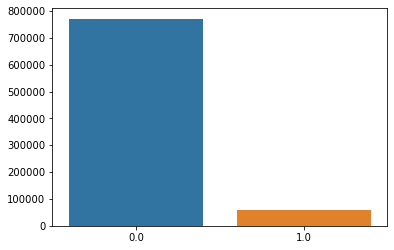

In [12]:
dis = y.value_counts()
sns.barplot(x=dis.index, y=dis.values)

In [13]:
from sklearn.model_selection import train_test_split

# Зафиксируем значение random_state для воспроизводимости результатов.
RANDOM_STATE = 888

train_idx, valid_idx = train_test_split(X.index, test_size=0.25, random_state=RANDOM_STATE)

y_train, y_valid = y.loc[train_idx], y.loc[valid_idx]
X_train, X_valid = X.loc[train_idx], X.loc[valid_idx]

print("Train")
print(y.loc[train_idx].value_counts()/train_idx.shape[0])
print()
print("Test")
print(y.loc[valid_idx].value_counts()/valid_idx.shape[0])

Train
0.0    0.927521
1.0    0.072479
Name: target, dtype: float64

Test
0.0    0.927961
1.0    0.072039
Name: target, dtype: float64


### Логистическая регрессия

In [14]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=RANDOM_STATE, n_jobs=-1)

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

kfold_cv = KFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

def run_cv(estimator, cv, X, y, scoring='roc_auc', model_name=""):
    cv_res = cross_validate(estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    
    print("%s: %s = %0.2f (+/- %0.2f)" % (model_name,
                                         scoring,
                                         cv_res['test_score'].mean(),
                                         cv_res['test_score'].std() * 2))

In [16]:
run_cv(log_reg, kfold_cv, X_train, y_train, model_name="Baseline");

Baseline: roc_auc = 0.56 (+/- 0.00)


### Графики и метрики baseline модели на тесте

In [17]:
log_reg.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, random_state=888)

In [18]:
log_reg_pred = log_reg.predict_proba(X_valid)[:,1]

#### Распределение предсказаний baseline модели

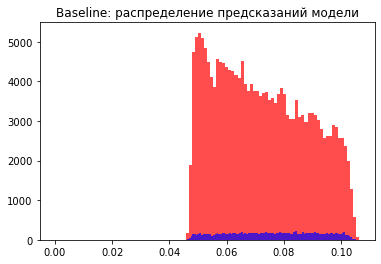

In [19]:
plt.title("Baseline: распределение предсказаний модели")
plt.hist(log_reg_pred[~y_valid.astype(bool)], bins=100, color='r', alpha=0.7);
plt.hist(log_reg_pred[y_valid.astype(bool)], bins=100, color='b', alpha=0.7);

#### Roc и PR Кривые

In [20]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

fpr, tpr, roc_thresholds = roc_curve(y_valid, log_reg_pred)
precision, recall, pr_thresholds = precision_recall_curve(y_valid, log_reg_pred)

Baseline: AUC_ROC = 0.567


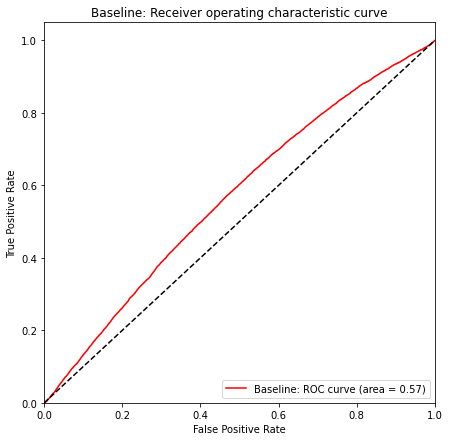

In [21]:
def plot_roc_curve(fpr, tpr, model_name="", color=None):
    plt.plot(fpr, tpr, label='%s: ROC curve (area = %0.2f)' %
             (model_name, auc(fpr, tpr)), color=color)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0.0, 1.0, 0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('%s: Receiver operating characteristic curve' % model_name)
    plt.legend(loc="lower right")

plt.figure(figsize=(7, 7))
plot_roc_curve(fpr, tpr, "Baseline", color='r')
print("Baseline: AUC_ROC = %.3f" % auc(fpr, tpr))

Baseline: AUC_PR = 0.086


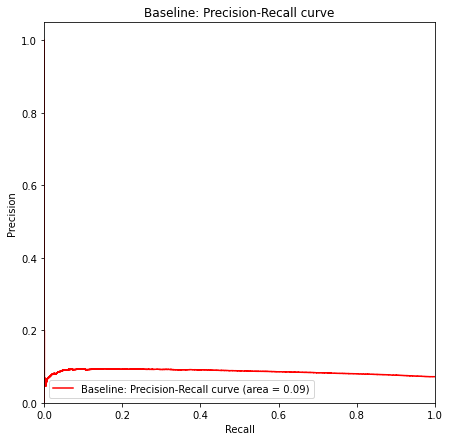

In [22]:
def plot_precision_recall_curve(recall, precision, model_name="", color=None):
    plt.plot(recall, precision, label='%s: Precision-Recall curve (area = %0.2f)' %
             (model_name, auc(recall, precision)), color=color)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title("%s: Precision-Recall curve" % model_name)
    plt.axis([0.0, 1.0, 0.0, 1.05])
    plt.legend(loc="lower left")

plt.figure(figsize=(7, 7))
    
plot_precision_recall_curve(recall, precision, "Baseline", color='r')
print("Baseline: AUC_PR = %.3f" % auc(recall, precision))

#### Матрица смежности

In [23]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          model_name="",
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest',  cmap=cmap)
    
    plt.grid(False)
    plt.title('%s: confusion matrix' % model_name)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[192936      0]
 [ 14978      0]]


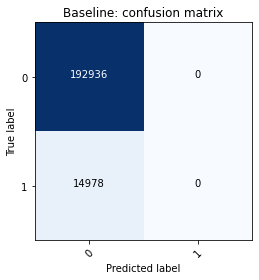

In [24]:
# TN                FP(Type I error)
# 
# FN(Type II error)  TP

cm = confusion_matrix(y_valid, log_reg_pred > 0.5)
plot_confusion_matrix(cm, classes=["0", "1"], model_name="Baseline");

#### classification_report

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, log_reg_pred > 0.5))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96    192936
         1.0       0.00      0.00      0.00     14978

    accuracy                           0.93    207914
   macro avg       0.46      0.50      0.48    207914
weighted avg       0.86      0.93      0.89    207914



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Определение типа признаков

In [26]:
X_nunique = X.nunique()

In [27]:
X_nunique

id          806613
vas_id           8
buy_time        26
0            46162
1           112909
             ...  
248           2342
249            265
250           1599
251            248
252             30
Length: 256, dtype: int64

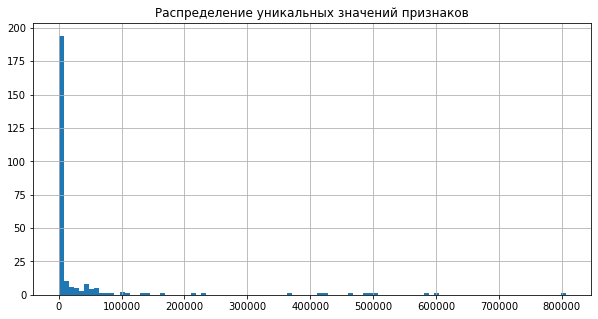

In [28]:
plt.title("Распределение уникальных значений признаков");
X_nunique.hist(bins=100, figsize=(10, 5));

In [29]:
f_all = set(X_nunique.index.tolist())
len(f_all)

256

#### константные признаки

In [30]:
f_const = set(X_nunique[X_nunique == 1].index.tolist())
len(f_const)

5

In [31]:
f_const

{'139', '203', '75', '81', '85'}

#### вещественные признаки

In [32]:
f_numeric = (X.fillna(0).astype(int).sum() - X.fillna(0).sum()).abs()
f_numeric = set(f_numeric[f_numeric > 0].index.tolist())
len(f_numeric)

247

In [33]:
f_other = f_all - (f_numeric | f_const)
len(f_other)

4

#### бинарные

In [34]:
f_binary = set(X.loc[:, f_other].columns[(
                      (X.loc[:, f_other].max() == 1) & \
                      (X.loc[:, f_other].min() == 0) & \
                      (X.loc[:, f_other].isnull().sum() == 0))])
len(f_binary)

0

In [35]:
f_other = f_other - f_binary
len(f_other)

4

#### целочисленные признаки

In [36]:
f_int = (X.loc[:, f_other].astype(int).sum() - X.loc[:, f_other].sum()).abs()
f_int = set(f_int[f_int == 0].index.tolist())
len(f_int)

4

In [37]:
X[f_int]

,buy_time,252,vas_id,id
0,1537131600,0.0,8,540968
1,1531688400,0.0,4,1454121
2,1534107600,0.0,1,2458816
3,1535922000,0.0,5,3535012
4,1535922000,0.0,1,1693214
...,...,...,...,...
831648,1546203600,0.0,2,3812226
831649,1546203600,0.0,2,2480469
831650,1546203600,0.0,2,158236
831651,1546203600,1.0,2,1825525


In [38]:
f_other == f_int

True

In [39]:
X['vas_id'].value_counts()

1    310175
2    249505
5     94085
4     85756
6     57878
7     15432
8     13350
9      5472
Name: vas_id, dtype: int64

In [40]:
f_categorical = set(X_nunique.loc[f_other][X_nunique.loc[f_other] <= 10].index.tolist())

In [41]:
f_categorical

{'vas_id'}

In [42]:
f_other = f_other - f_categorical
len(f_other)

3

In [43]:
f_numeric = f_numeric | f_other

In [44]:
f_other = f_other - f_numeric
len(f_other)

0

In [45]:
assert(X_nunique.shape[0] == len(f_const) + len(f_binary) + len(f_numeric) + len(f_categorical))

In [46]:
print('f_all:', X.shape[1])
print()
print('f_const:', len(f_const))
print('f_binary:', len(f_binary))
print('f_categorical:', len(f_categorical))
print('f_numeric:', len(f_numeric))

f_ok = list(f_binary | f_categorical | f_numeric)
f_binary, f_categorical, f_numeric = list(f_binary), list(f_categorical), list(f_numeric)

f_all: 256

f_const: 5
f_binary: 0
f_categorical: 1
f_numeric: 250


In [47]:
len(f_ok)

251

## Пайплайны

### Column selector

In [48]:
from sklearn.base import BaseEstimator, TransformerMixin

In [49]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        assert isinstance(X, pd.DataFrame)

        try:
            return X[self.columns]
        except KeyError:
            cols_error = list(set(self.columns) - set(X.columns))
            raise KeyError("DataFrame не содердит следующие колонки: %s" % cols_error)

### Пайплайн обработки признаков

In [50]:
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [51]:
f_prep_pipeline = make_pipeline(
    ColumnSelector(columns=f_ok),
    FeatureUnion(transformer_list=[
        ("numeric_features", make_pipeline(
            ColumnSelector(f_numeric),
            #SimpleImputer(strategy="mean"),
            StandardScaler()
        )),
        ("categorical_features", make_pipeline(
            ColumnSelector(f_categorical),
            #SimpleImputer(strategy="most_frequent"),
            OneHotEncoder(handle_unknown='ignore')
        ))
    ])
)

In [52]:
f_prep_pipeline.steps

[('columnselector',
  ColumnSelector(columns=['83', '154', '86', '24', '130', '95', '211', '7', '134',
                          '171', '90', '71', '63', '84', '106', '31', '6', '22',
                          '214', '107', '181', '207', '122', '108', '185', '201',
                          '43', '202', '231', '170', ...])),
 ('featureunion',
  FeatureUnion(transformer_list=[('numeric_features',
                                  Pipeline(steps=[('columnselector',
                                                   ColumnSelector(columns=['83',
                                                                           '154',
                                                                           '86',
                                                                           '24',
                                                                           '130',
                                                                           '95',
                                            

In [53]:
X_valid.shape[1]

256

In [54]:
f_prep_pipeline.fit(X_train)

n_features = f_prep_pipeline.transform(X_valid).shape[1]
n_features

258

### Greedsearch для пайплайнов

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

kfold_cv = KFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

In [56]:
lg_pipe = make_pipeline(
    f_prep_pipeline,
    LogisticRegression(random_state=RANDOM_STATE)
)

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
def run_grid_search(estimator, X, y, params_grid, cv, scoring='roc_auc'):
    gsc = GridSearchCV(estimator, params_grid, scoring=scoring, cv=cv, n_jobs=-1)

    gsc.fit(X, y)
    print("Best %s score: %.2f" % (scoring, gsc.best_score_))
    print()
    print("Best parameters set found on development set:")
    print()
    print(gsc.best_params_)
    print()
    print("Grid scores on development set:")
    print()

    for i, params in enumerate(gsc.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (gsc.cv_results_['mean_test_score'][i], gsc.cv_results_['std_test_score'][i] * 2, params))

    print()
    
    return gsc

In [59]:
param_grid = {
    "logisticregression__penalty": ['l1', 'l2'],
    "logisticregression__C": [0.01, 0.1, 5.0]
}

lg_gsc = run_grid_search(lg_pipe, X_train, y_train, param_grid, kfold_cv)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.8692625         nan 0.86996237        nan 0.87001664]
  warnings.warn(


Best roc_auc score: 0.87

Best parameters set found on development set:

{'logisticregression__C': 5.0, 'logisticregression__penalty': 'l2'}

Grid scores on development set:

nan (+/-nan) for {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l1'}
0.869 (+/-0.002) for {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2'}
nan (+/-nan) for {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l1'}
0.870 (+/-0.002) for {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}
nan (+/-nan) for {'logisticregression__C': 5.0, 'logisticregression__penalty': 'l1'}
0.870 (+/-0.002) for {'logisticregression__C': 5.0, 'logisticregression__penalty': 'l2'}



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## LogReg с использованием пайплайнов

In [60]:
# С = 0.1

In [61]:
lg_pipe_2 = make_pipeline(
    f_prep_pipeline,
    LogisticRegression(random_state=RANDOM_STATE, C = 0.1, n_jobs=-1)
)

In [63]:
lg_pipe_2.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columnselector',
                                  ColumnSelector(columns=['83', '154', '86',
                                                          '24', '130', '95',
                                                          '211', '7', '134',
                                                          '171', '90', '71',
                                                          '63', '84', '106',
                                                          '31', '6', '22',
                                                          '214', '107', '181',
                                                          '207', '122', '108',
                                                          '185', '201', '43',
                                                          '202', '231', '170', ...])),
                                 ('featureunion',
                                  FeatureUnion(transformer_list=[('numeric_features',


In [64]:
log_reg_2_pred = lg_pipe_2.predict_proba(X_valid)[:,1]

In [65]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

fpr, tpr, roc_thresholds = roc_curve(y_valid, log_reg_2_pred)
precision, recall, pr_thresholds = precision_recall_curve(y_valid, log_reg_2_pred)

LogReg+Pipe: AUC_ROC = 0.872


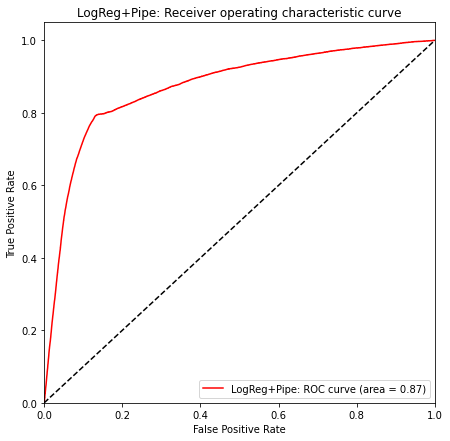

In [66]:
plt.figure(figsize=(7, 7))
plot_roc_curve(fpr, tpr, "LogReg+Pipe", color='r')
print("LogReg+Pipe: AUC_ROC = %.3f" % auc(fpr, tpr))

LogReg+Pipe: AUC_PR = 0.374


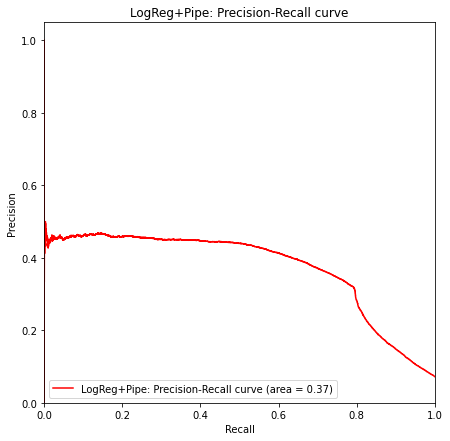

In [67]:
plt.figure(figsize=(7, 7))
    
plot_precision_recall_curve(recall, precision, "LogReg+Pipe", color='r')
print("LogReg+Pipe: AUC_PR = %.3f" % auc(recall, precision))

Confusion matrix, without normalization
[[191240   1696]
 [ 13535   1443]]


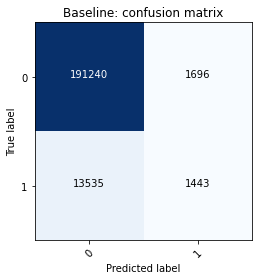

In [68]:
# TN                FP(Type I error)
# 
# FN(Type II error)  TP

cm = confusion_matrix(y_valid, log_reg_2_pred > 0.5)
plot_confusion_matrix(cm, classes=["0", "1"], model_name="Baseline");

In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, log_reg_2_pred > 0.34))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96    192936
         1.0       0.44      0.48      0.46     14978

    accuracy                           0.92    207914
   macro avg       0.70      0.72      0.71    207914
weighted avg       0.92      0.92      0.92    207914



## CatBoost

In [72]:
import catboost

In [73]:
kfold_cv = KFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

In [74]:
model_catb = catboost.CatBoostClassifier(cat_features=['id', 'vas_id'],
                                      silent=True, random_state=21)

In [75]:
model_catb.get_params()

{'silent': True, 'random_state': 21, 'cat_features': ['id', 'vas_id']}

In [76]:
param_grid = {
    "depth": [3],
    "iterations": [300],
    'l2_leaf_reg': [5, 15, 25]
}

In [77]:
lg_gsc = run_grid_search(model_catb, X_train, y_train, param_grid, kfold_cv)

Best roc_auc score: 0.94

Best parameters set found on development set:

{'depth': 3, 'iterations': 300, 'l2_leaf_reg': 5}

Grid scores on development set:

0.941 (+/-0.002) for {'depth': 3, 'iterations': 300, 'l2_leaf_reg': 5}
0.941 (+/-0.002) for {'depth': 3, 'iterations': 300, 'l2_leaf_reg': 15}
0.941 (+/-0.002) for {'depth': 3, 'iterations': 300, 'l2_leaf_reg': 25}



## Построение наилучшей модели

In [162]:
model_catb = catboost.CatBoostClassifier(n_estimators=200, max_depth=3, l2_leaf_reg =5, cat_features=['id', 'vas_id'],
                                      silent=True, random_state=21)

In [163]:
model_catb.fit(X_train, y_train)

In [164]:
catb_pred = model_catb.predict_proba(X_valid)[:,1]

In [165]:
fpr, tpr, roc_thresholds = roc_curve(y_valid, catb_pred)
precision, recall, pr_thresholds = precision_recall_curve(y_valid, catb_pred)

CatBoost: AUC_ROC = 0.947


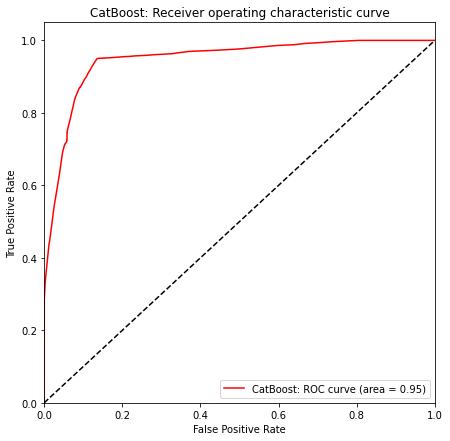

In [166]:
plt.figure(figsize=(7, 7))
plot_roc_curve(fpr, tpr, "CatBoost", color='r')
print("CatBoost: AUC_ROC = %.3f" % auc(fpr, tpr))

CatBoost: AUC_PR = 0.694


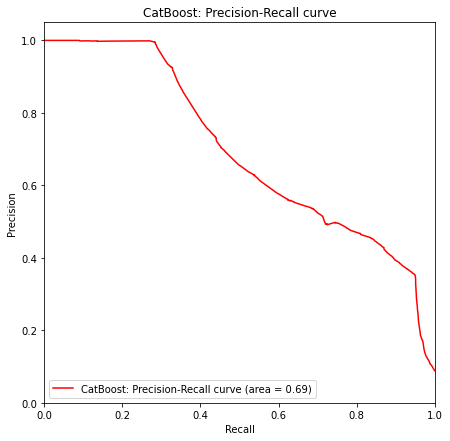

In [167]:
plt.figure(figsize=(7, 7))
    
plot_precision_recall_curve(recall, precision, "CatBoost", color='r')
print("CatBoost: AUC_PR = %.3f" % auc(recall, precision))

Confusion matrix, without normalization
[[192535    401]
 [ 10060   4918]]


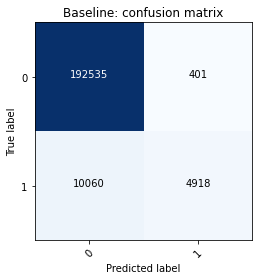

In [168]:
# TN                FP(Type I error)
# 
# FN(Type II error)  TP

cm = confusion_matrix(y_valid, catb_pred > 0.5)
plot_confusion_matrix(cm, classes=["0", "1"], model_name="Baseline");

In [169]:
print(classification_report(y_valid, catb_pred > 0.38))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97    192936
         1.0       0.63      0.54      0.58     14978

    accuracy                           0.94    207914
   macro avg       0.80      0.76      0.77    207914
weighted avg       0.94      0.94      0.94    207914



## Сравнение моделей

LogReg: AUC_PR = 0.086
LogReg: AUC_ROC = 0.567
LogReg+Pipe: AUC_PR = 0.374
LogReg+Pipe: AUC_ROC = 0.872
CatBoost: AUC_PR = 0.694
CatBoost: AUC_ROC = 0.947


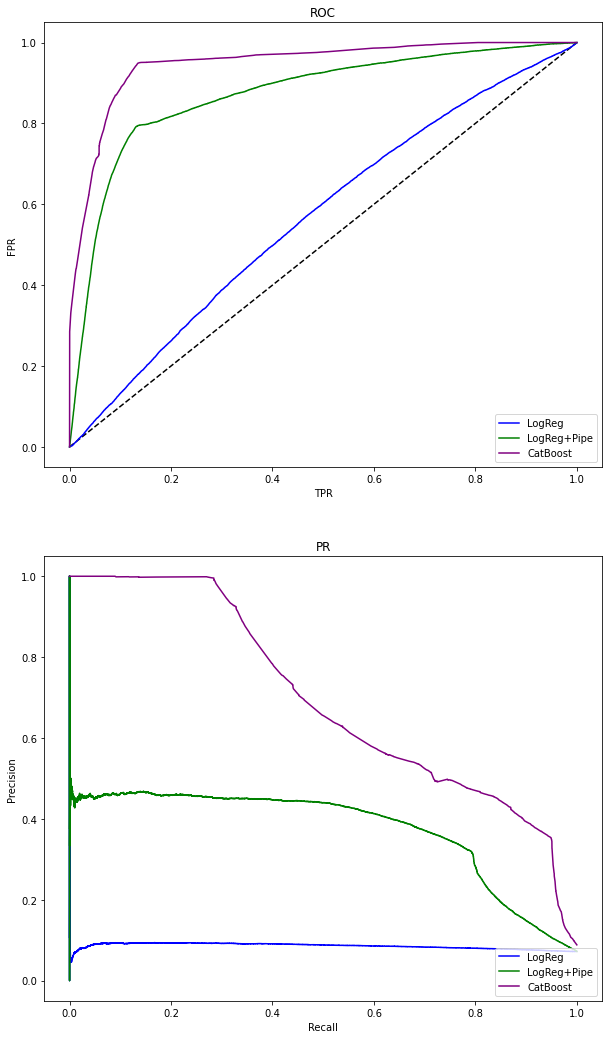

In [170]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

f.set_figheight(18)
f.set_figwidth(10)

ax1 = plt.subplot(211)
ax1.set_title('ROC')
ax1.set_xlabel('TPR')
ax1.set_ylabel('FPR')


ax2 = plt.subplot(212)
ax2.set_title('PR')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')

ax1.plot([0, 1], [0, 1], 'k--')

fpr, tpr, roc_thresholds = roc_curve(y_valid, log_reg_pred)
precision, recall, pr_thresholds = precision_recall_curve(y_valid, log_reg_pred)
ax1.plot(fpr, tpr, label='LogReg', color='b')
ax2.plot(recall, precision, label='LogReg', color='b')
print("LogReg: AUC_PR = %.3f" % auc(recall, precision))
print("LogReg: AUC_ROC = %.3f" % auc(fpr, tpr))


fpr, tpr, roc_thresholds = roc_curve(y_valid, log_reg_2_pred)
precision, recall, pr_thresholds = precision_recall_curve(y_valid, log_reg_2_pred)
ax1.plot(fpr, tpr, label="LogReg+Pipe", color='g')
ax2.plot(recall, precision, label="LogReg+Pipe", color='g')
print("LogReg+Pipe: AUC_PR = %.3f" % auc(recall, precision))
print("LogReg+Pipe: AUC_ROC = %.3f" % auc(fpr, tpr))


fpr, tpr, roc_thresholds = roc_curve(y_valid, catb_pred)
precision, recall, pr_thresholds = precision_recall_curve(y_valid, catb_pred)
ax1.plot(fpr, tpr, label="CatBoost", color='purple')
ax2.plot(recall, precision, label="CatBoost", color='purple')
print("CatBoost: AUC_PR = %.3f" % auc(recall, precision))
print("CatBoost: AUC_ROC = %.3f" % auc(fpr, tpr))
ax1.legend(loc="lower right")
ax2.legend(loc="lower right");

In [171]:
f.savefig('data//my_fig', dpi = 200)

## Получение результата

### Обучаем модель с наилучшими параметрами

In [172]:
result_model = catboost.CatBoostClassifier(n_estimators=200, max_depth=4, l2_leaf_reg =15, cat_features=['id', 'vas_id'],
                                      silent=True, random_state=None)

In [173]:
result_model.fit(X, y)

In [174]:
result_proba = result_model.predict_proba(X_test)

In [175]:
result = result_model.predict(X_test)

In [176]:
result.sum()

1997.0

In [177]:
result_proba

array([[0.99881301, 0.00118699],
       [0.84974072, 0.15025928],
       [0.99881301, 0.00118699],
       ...,
       [0.99881763, 0.00118237],
       [0.99881303, 0.00118697],
       [0.99881702, 0.00118298]])

In [178]:
result_proba[:, 1]

array([0.00118699, 0.15025928, 0.00118699, ..., 0.00118237, 0.00118697,
       0.00118298])

In [179]:
result.shape

(71231,)

### Формируем датафрейм с результатом для сохранения

In [180]:
answers_test = X_test[['id', 'vas_id', 'buy_time']]

In [181]:
answers_test

,id,vas_id,buy_time
0,3130519,2,1548018000
1,2000860,4,1548018000
2,1099444,2,1546808400
3,1343255,5,1547413200
4,1277040,2,1546808400
...,...,...,...
71226,2502453,5,1548018000
71227,1693213,2,1548018000
71228,1891350,2,1548018000
71229,2437172,2,1548018000


In [182]:
target = pd.DataFrame(result_proba[:, 1], columns = ['target'])

In [183]:
target

,target
0,0.001187
1,0.150259
2,0.001187
3,0.001186
4,0.001187
...,...
71226,0.001187
71227,0.001187
71228,0.001182
71229,0.001187


In [184]:
answers_test = pd.concat([answers_test, target], axis=1)

In [185]:
# answers_test.rename(columns={'buy_time': 'buy_time'}, inplace=True)

In [186]:
answers_test['vas_id'] = answers_test['vas_id'].astype('float')

In [187]:
answers_test

,id,vas_id,buy_time,target
0,3130519,2.0,1548018000,0.001187
1,2000860,4.0,1548018000,0.150259
2,1099444,2.0,1546808400,0.001187
3,1343255,5.0,1547413200,0.001186
4,1277040,2.0,1546808400,0.001187
...,...,...,...,...
71226,2502453,5.0,1548018000,0.001187
71227,1693213,2.0,1548018000,0.001187
71228,1891350,2.0,1548018000,0.001182
71229,2437172,2.0,1548018000,0.001187


In [188]:
answers_test.to_csv('data//answers_test.csv')

### Сохраняем итоговую модель (с проверкой)

In [189]:
import pickle
filename = 'data//final_model.pkl' # name to store model

In [190]:
pickle.dump(result_model, open(filename, 'wb')) # pickling

In [191]:
from_file = catboost.CatBoostClassifier()

In [192]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(X_test).sum()

1997.0

### Принцип составления индивидуальных предложений для абонентов

In [2]:
train = pd.read_csv('data//data_train.csv')

In [8]:
dis = train['target'].value_counts()
dis

0.0    771467
1.0     60186
Name: target, dtype: int64

<AxesSubplot:>

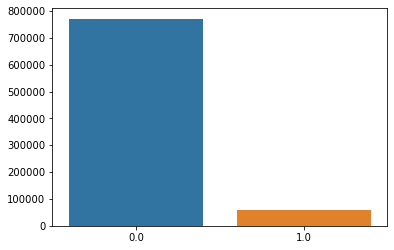

In [9]:
sns.barplot(x=dis.index, y=dis.values)